In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [118]:
## fetching the dataset
data_train = np.loadtxt('mnist_train.csv',delimiter=',')
data_test = np.loadtxt('mnist_test.csv',delimiter=',')
print(data_test)

[[7. 0. 0. ... 0. 0. 0.]
 [2. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [4. 0. 0. ... 0. 0. 0.]
 [5. 0. 0. ... 0. 0. 0.]
 [6. 0. 0. ... 0. 0. 0.]]


In [119]:
## preparing testing and training data
data_train = data_train[np.logical_or(data_train[:,0]==0,data_train[:,0]==1)]
y_train = data_train[:,0][:,np.newaxis].astype(np.int)
x_train = data_train[:,1:]/255.0

data_test = data_test[np.logical_or(data_test[:,0]==0,data_test[:,0]==1)]
y_test = data_test[:,0][:,np.newaxis].astype(np.int)
x_test = data_test[:,1:]/255.0


In [120]:
## augmentation
def augment_feature(x):
    x = np.hstack((np.ones((x.shape[0],1)),x))
    return x
x_train = augment_feature(x_train)
x_test = augment_feature(x_test)

In [121]:
## defining Logistic regession
def logistic(x,theta):
    y = 1.0/(1.0+np.exp(-np.dot(x,theta)))
    return y
##predictions 
def prediction(x,theta,threshold,h):
    y = h(x,theta)
    y = (y>threshold)*1
    return y

In [122]:
## gradient descent
def gradient_descent(x,y,theta,alpha,h,max_iteration):
    t=1
    while t<max_iteration:
        y_predict =h(x,theta)
        error = y_predict-y
        error_x = error*x
        theta = theta - alpha*np.mean(error_x,axis=0)[:,np.newaxis]
        t = t+1
    return theta


In [123]:
initial_theta = np.zeros((x_train.shape[1],1))
opti_theta = gradient_descent(x=x_train,y=y_train,theta=initial_theta,alpha=0.001,h=logistic,max_iteration=1000)

In [124]:
predictions= prediction(x=x_test,theta=opti_theta,h=logistic,threshold=0.5)
print('The actual value is {} and the pridicted value is {}'.format(y_test[5,0],predictions[5,0]))

The actual value is 1 and the pridicted value is 1


In [125]:
from sklearn.metrics import classification_report

In [126]:
print(classification_report(y_test[:,0],predictions[:,0]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135

    accuracy                           1.00      2115
   macro avg       1.00      1.00      1.00      2115
weighted avg       1.00      1.00      1.00      2115



In [116]:
print("empiracal accuracy is {}".format(np.mean(y_test==predictions)*100))

empiracal accuracy is 99.81087470449172


In [114]:
## converting vector to imante
def vec_to_image(vector,h=28,w=28):
    im = np.reshape(vector,(h,w))
    return im

image = vec_to_image(x_test[50,1:])

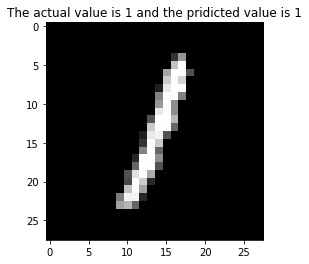

In [115]:
plt.imshow(image,cmap='gray')
plt.title('The actual value is {} and the pridicted value is {}'.format(y_test[50,0],predictions[50,0]));